In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
import itertools
import warnings
warnings.filterwarnings( "ignore")

In [2]:
# loading the data

car_df=pd.read_csv('CarFeatures.csv')

# Q1. Perform EDA on the given dataset.


In [3]:
# Look at the top 5 rows of the dataset
car_df.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [4]:
# looking at the shape of the datset
car_df.shape

(25, 18)

* The dataset has 25 rows and 18 columns

In [5]:
# looking for the col names
car_df.columns

Index(['Make', 'Fuel Type', 'Aspiration', 'Number of Doors', 'Body Style',
       'Drive Wheels', 'Engine Location', 'Number of Cylinders', 'Wheel Base',
       'Length', 'Width', 'Height', 'Curb Weight', 'Engine Size', 'Horsepower',
       'City MPG', 'Highway MPG', 'Price'],
      dtype='object')

In [6]:
# Check for duplicate values
car_df.duplicated().sum()

0

* There are no duplicates present in the dataset

In [7]:
# info about the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 25 non-null     object 
 1   Fuel Type            25 non-null     object 
 2   Aspiration           25 non-null     object 
 3   Number of Doors      25 non-null     object 
 4   Body Style           25 non-null     object 
 5   Drive Wheels         25 non-null     object 
 6   Engine Location      25 non-null     object 
 7   Number of Cylinders  25 non-null     object 
 8   Wheel Base           25 non-null     float64
 9   Length               25 non-null     float64
 10  Width                25 non-null     float64
 11  Height               25 non-null     float64
 12  Curb Weight          25 non-null     int64  
 13  Engine Size          25 non-null     int64  
 14  Horsepower           25 non-null     int64  
 15  City MPG             25 non-null     int64

* The dataset has no null values

* The dataset has 8 catagorical values an 10 numerical values

In [8]:
# Separating numerical and catagorical variables
car_df_num = car_df.select_dtypes(['float64','int64'])
car_df_cat = car_df.select_dtypes(['object'])

**Univariate analysis**

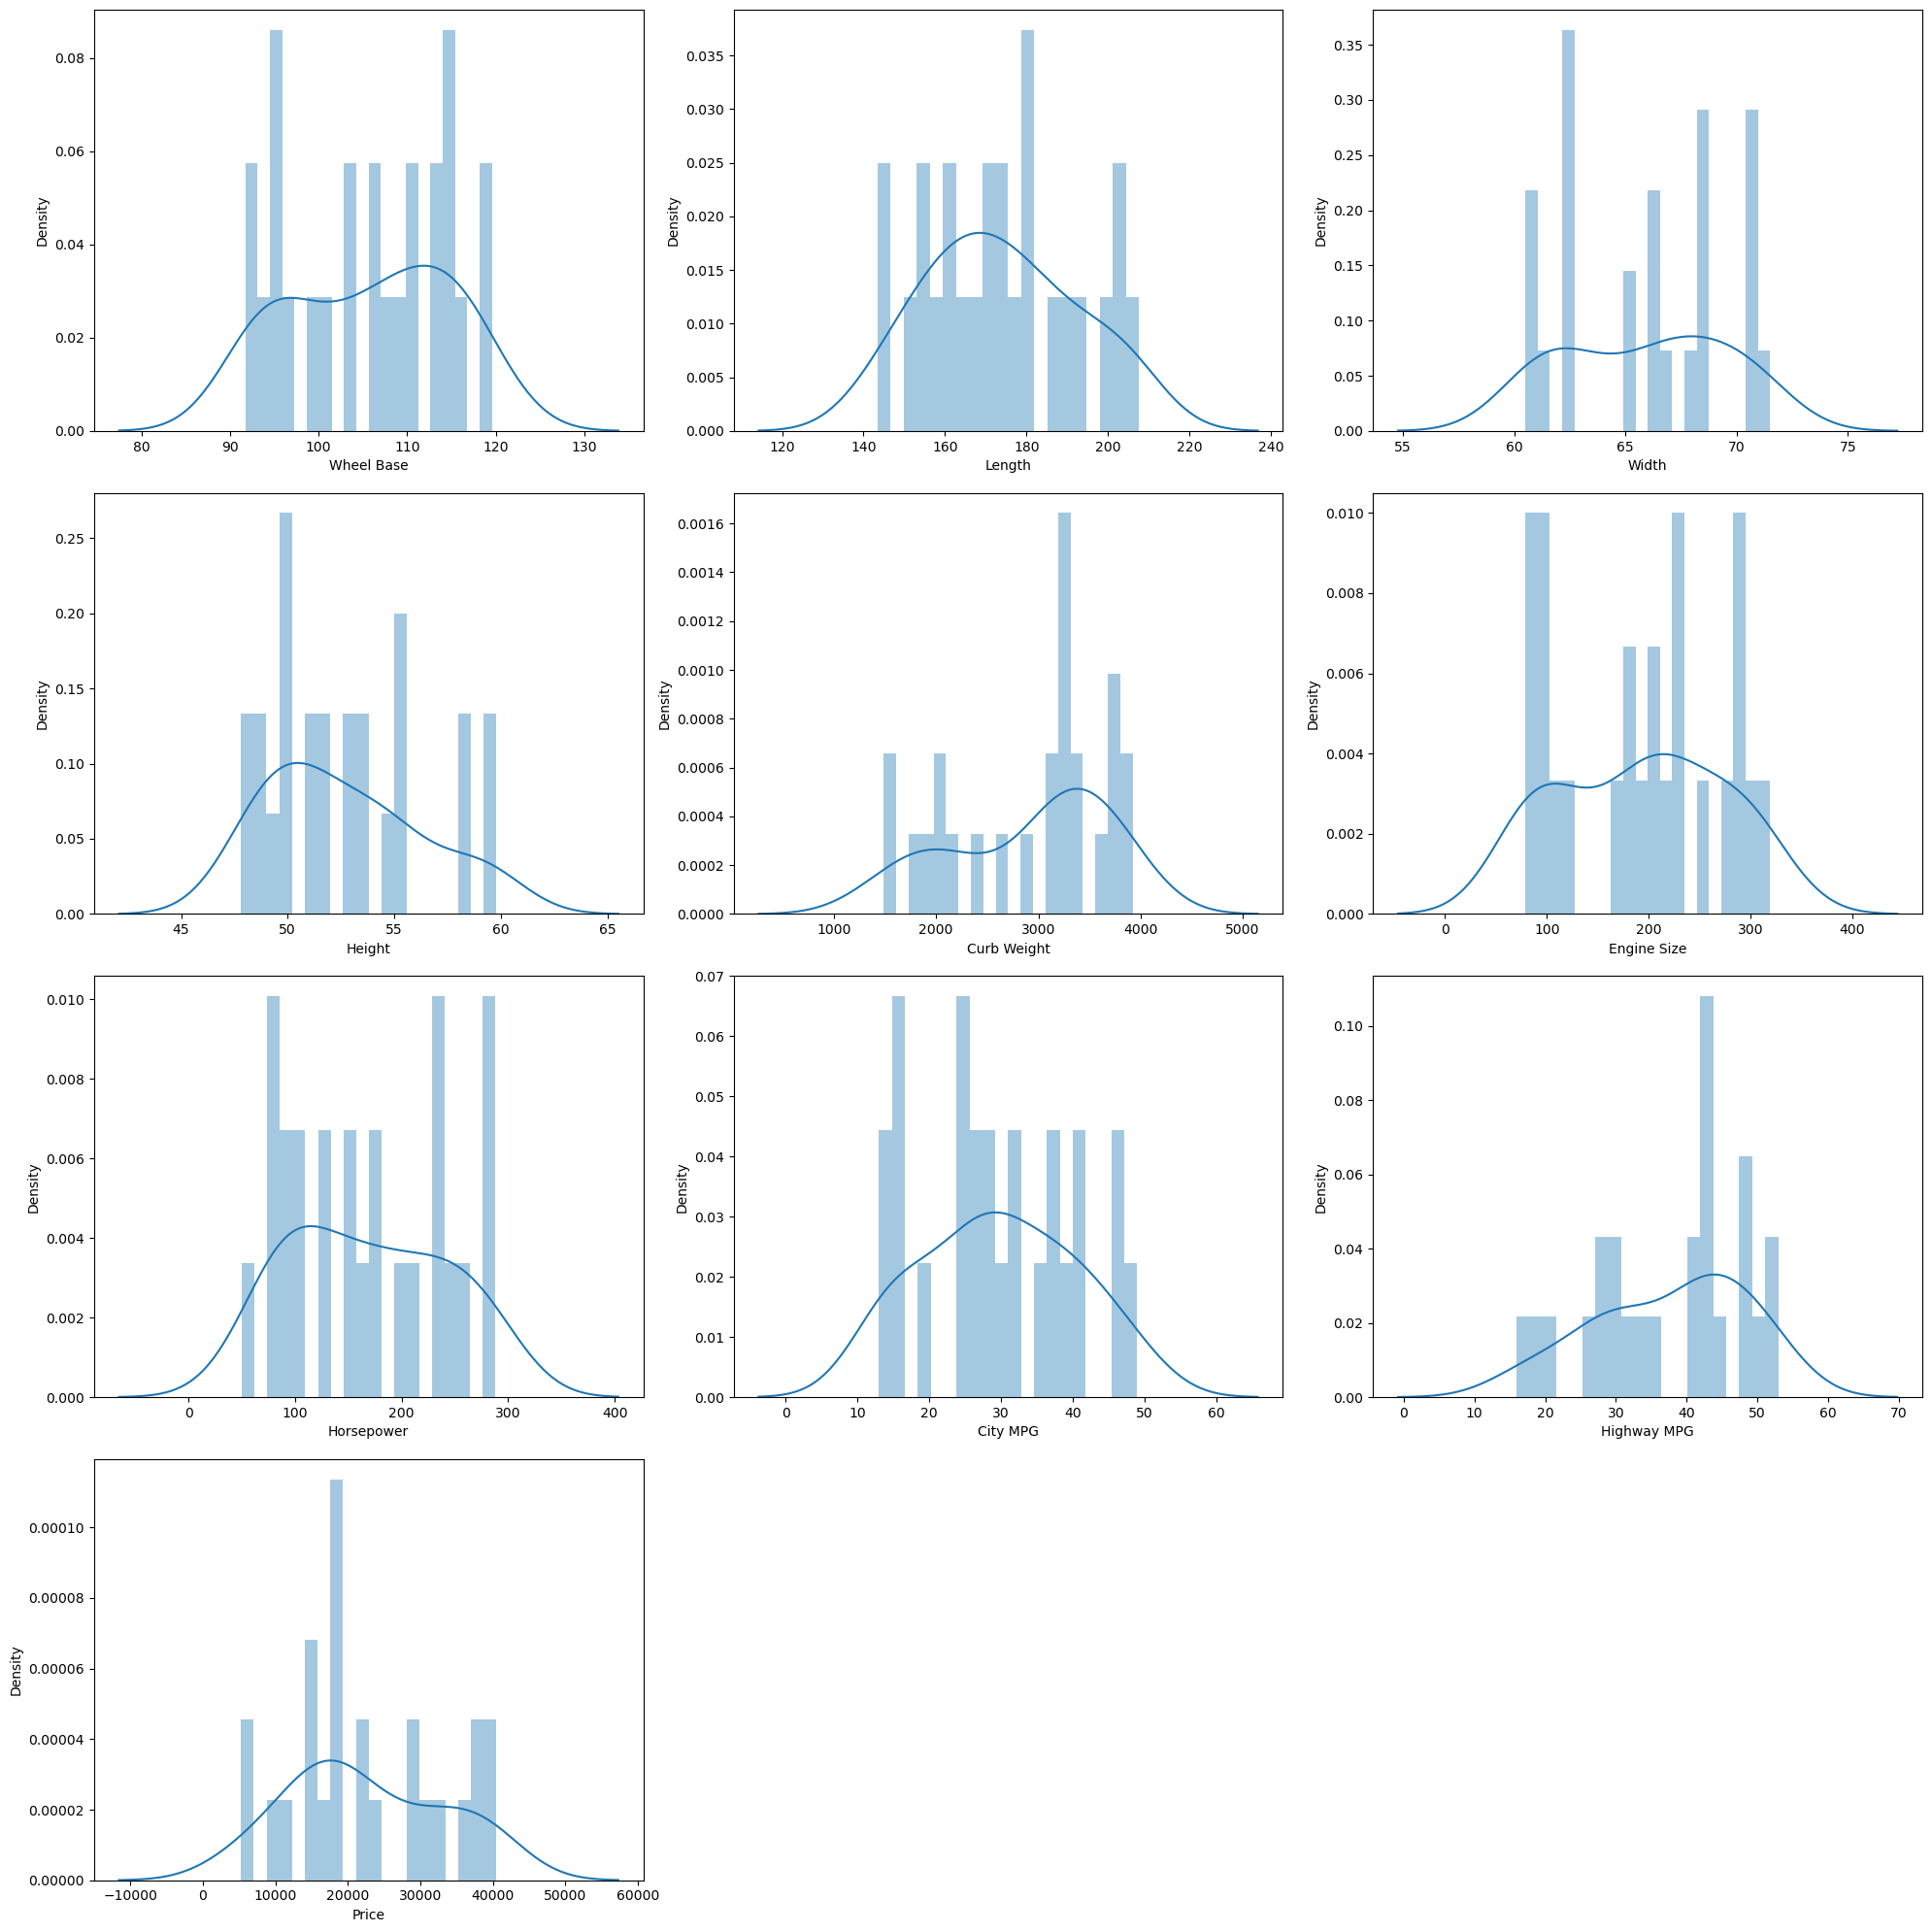

In [9]:
# Distribution plots for Numerical Variables
plt.figure(figsize=(20,20))
feature_list = car_df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,3,i+1)
    sns.distplot(car_df_num[feature_list[i]],kde=True,bins=20)
    plt.tight_layout()

plt.show()

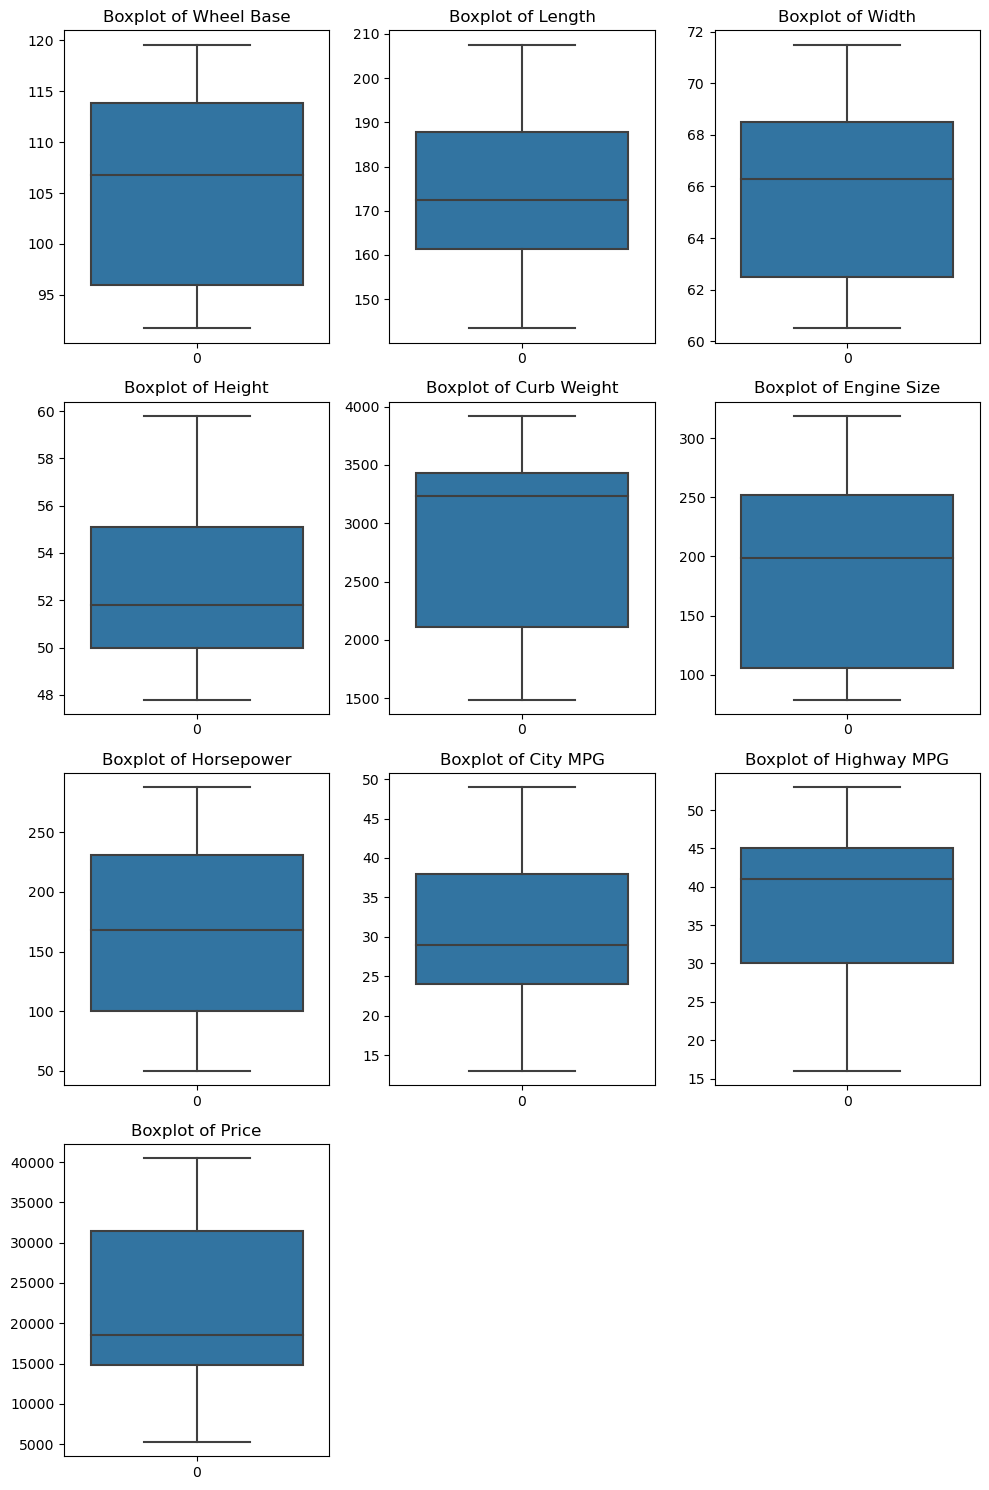

In [10]:
# checking for outliers 
plt.figure(figsize=(10,15))
feature_list = car_df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(car_df_num[feature_list[i]])
    plt.title("Boxplot of "+feature_list[i])
    plt.tight_layout()
plt.show()

* No outliers are present in our dataset

**Bivariate analysis**

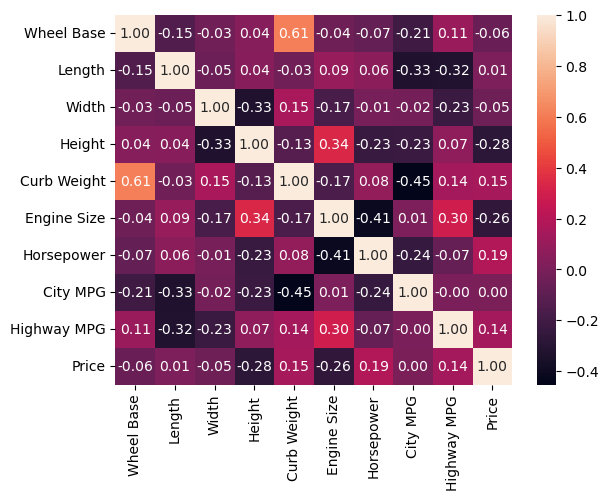

In [11]:
# heatmap for numerical columns
sns.heatmap(car_df_num.corr(method='pearson'),annot=True,fmt='.2f')
plt.show()

* Coorelation values near 1/-1 are highly positively correlated or highly negetively correlated
* Correlation near to 0 are not correlated to each other

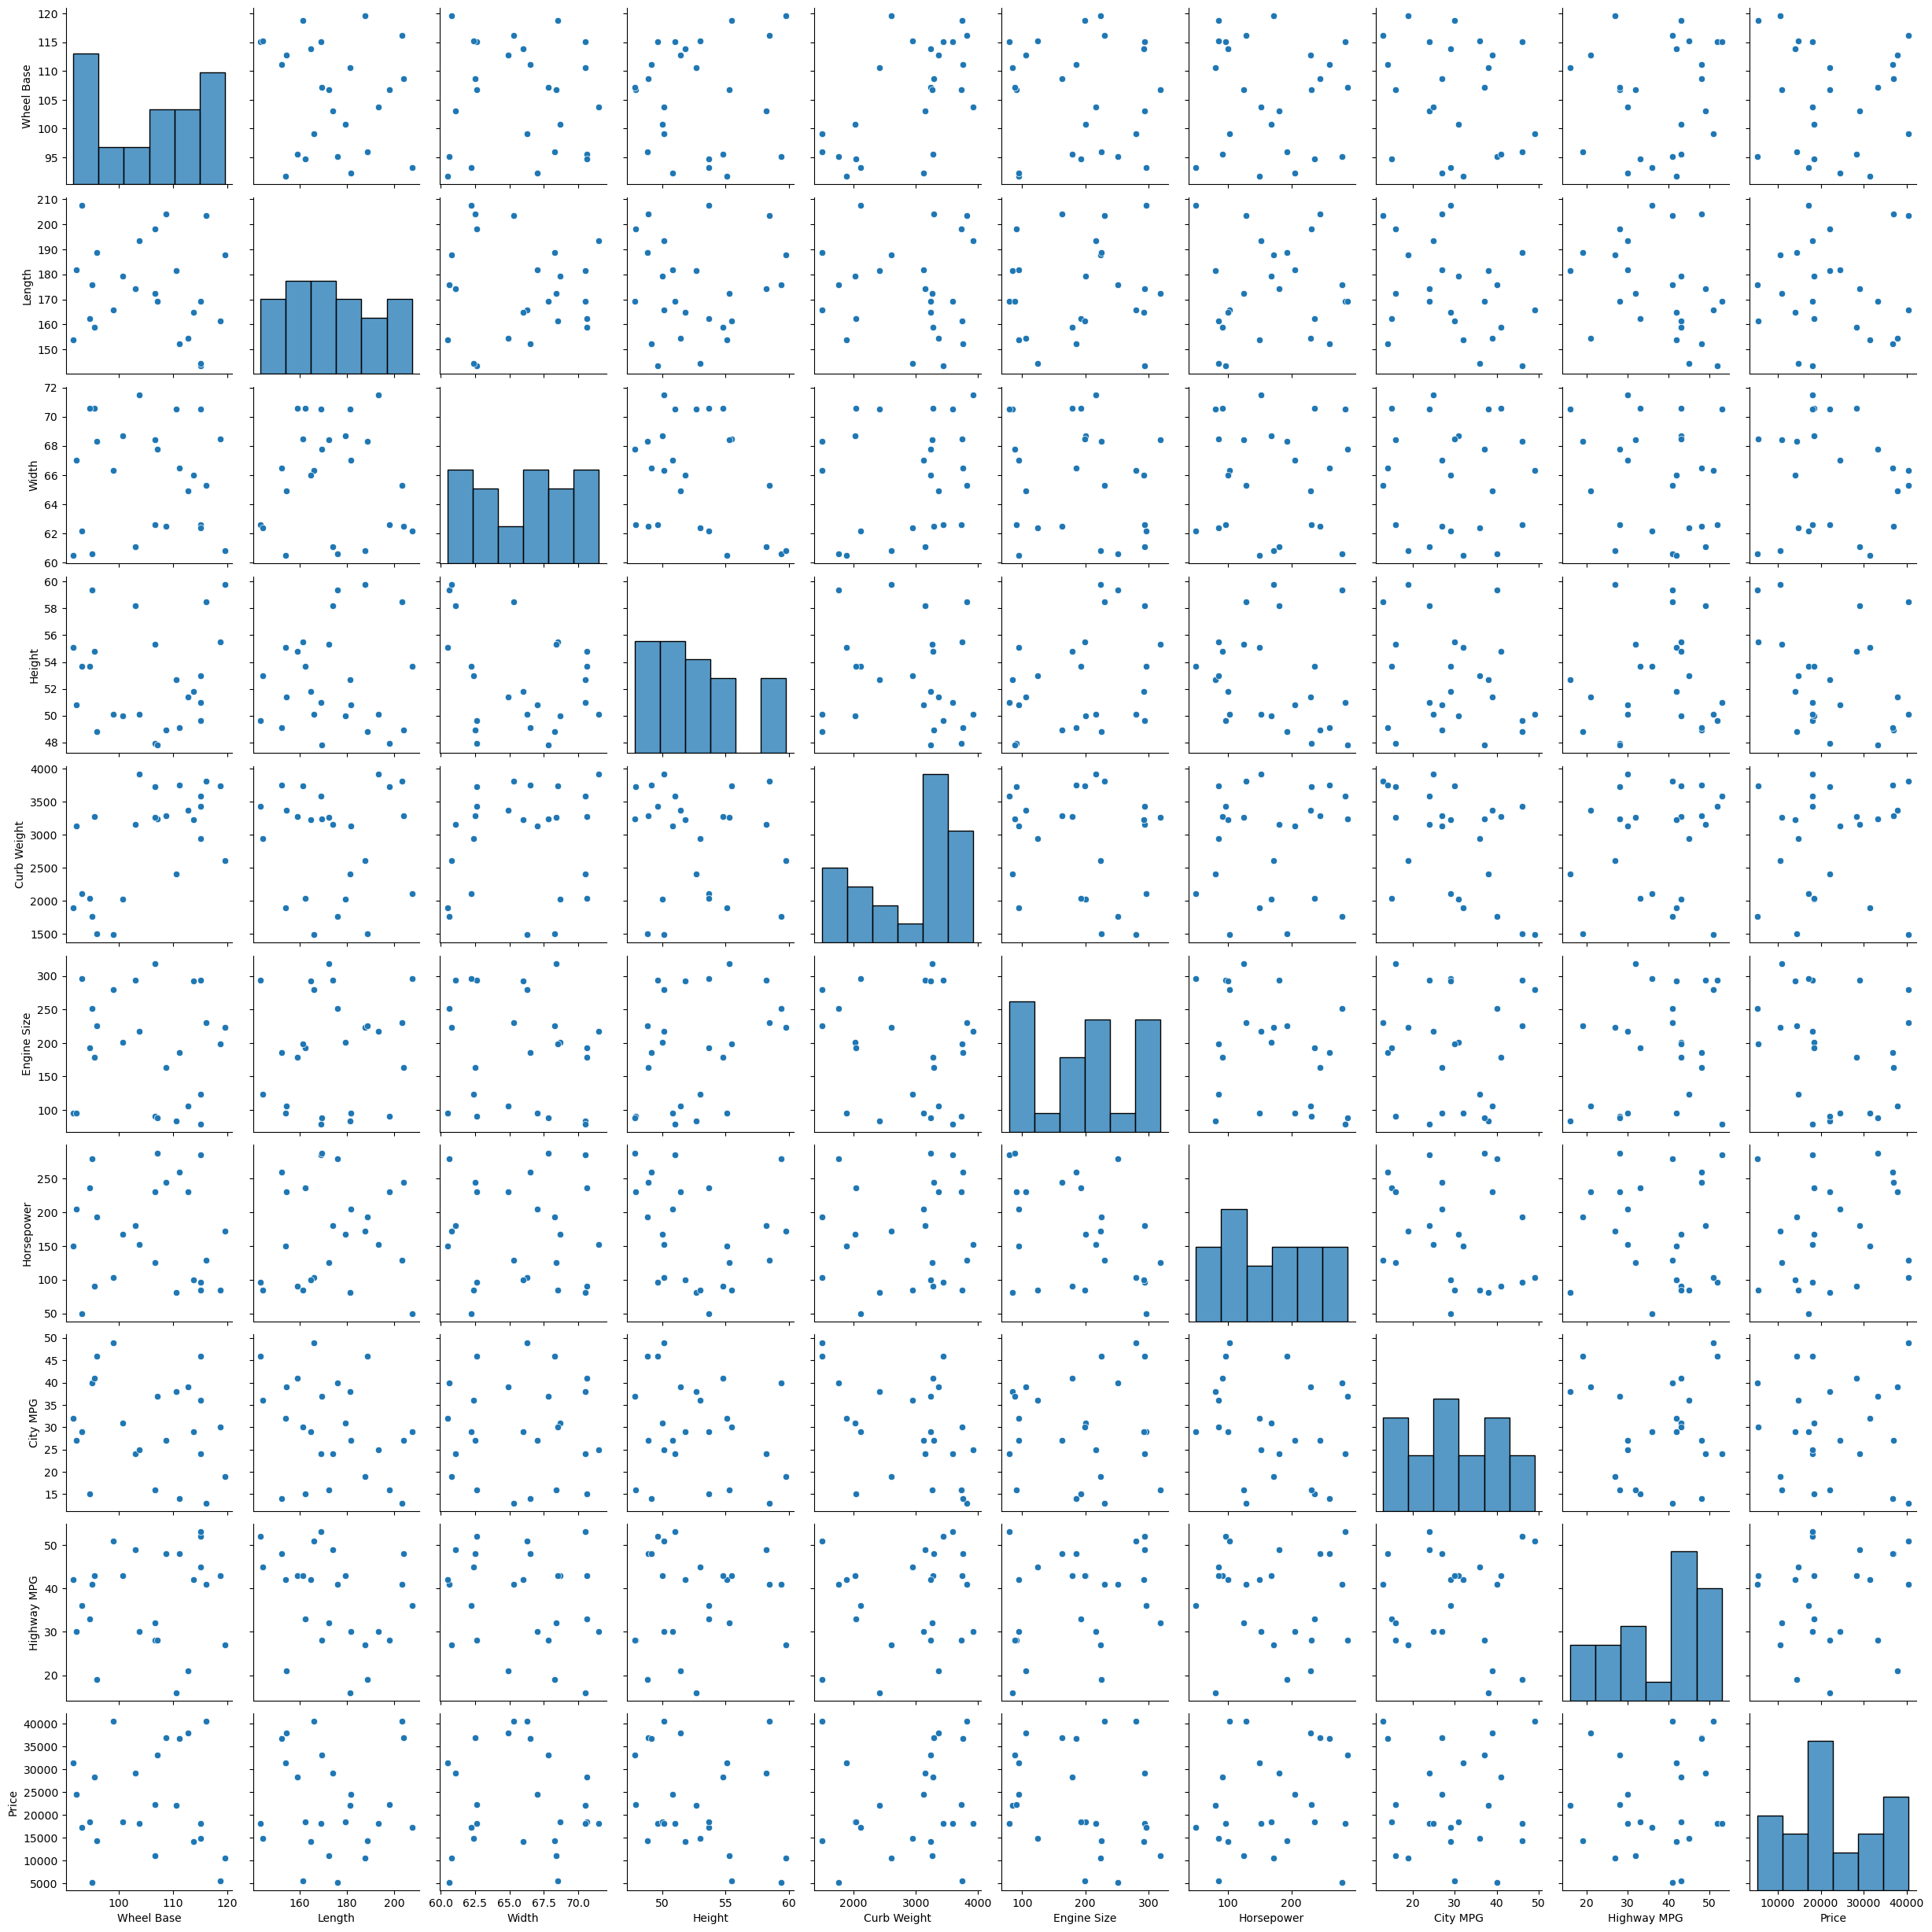

In [12]:
# pair plot for numerical cols
sns.pairplot(car_df)

* Multi-collinearity is not present in our dataset

# Q2.Summarize the data using descriptive statistics.

In [13]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wheel Base,25.0,105.736,9.046403,91.7,96.0,106.8,113.9,119.6
Length,25.0,173.928,18.508523,143.4,161.4,172.4,187.8,207.6
Width,25.0,65.868,3.632804,60.5,62.5,66.3,68.5,71.5
Height,25.0,52.680,3.623534,47.8,50.0,51.8,55.1,59.8
Curb Weight,25.0,2907.720,777.650924,1488.0,2108.0,3231.0,3433.0,3922.0
Engine Size,25.0,192.360,79.342548,79.0,106.0,199.0,252.0,319.0
Horsepower,25.0,168.760,73.189981,50.0,100.0,168.0,231.0,288.0
City MPG,25.0,29.720,10.659581,13.0,24.0,29.0,38.0,49.0
Highway MPG,25.0,37.640,10.664896,16.0,30.0,41.0,45.0,53.0
Price,25.0,22684.920,10684.205266,5272.0,14838.0,18524.0,31393.0,40466.0


In [14]:
car_df_cat.describe().T

,count,unique,top,freq
Make,25,10,Toyota,4
Fuel Type,25,2,Gas,13
Aspiration,25,2,Std,14
Number of Doors,25,2,Four,14
Body Style,25,5,Hatchback,7
Drive Wheels,25,3,Fwd,10
Engine Location,25,2,Rear,13
Number of Cylinders,25,7,Two,7


# Q3. Identify the costliest car and the cheapest car by average price.


In [15]:
car_by_price = car_df.groupby(['Make'],as_index=False).mean(numeric_only=True).sort_values(by="Price",ascending=False)

<Axes: xlabel='Make', ylabel='Price'>

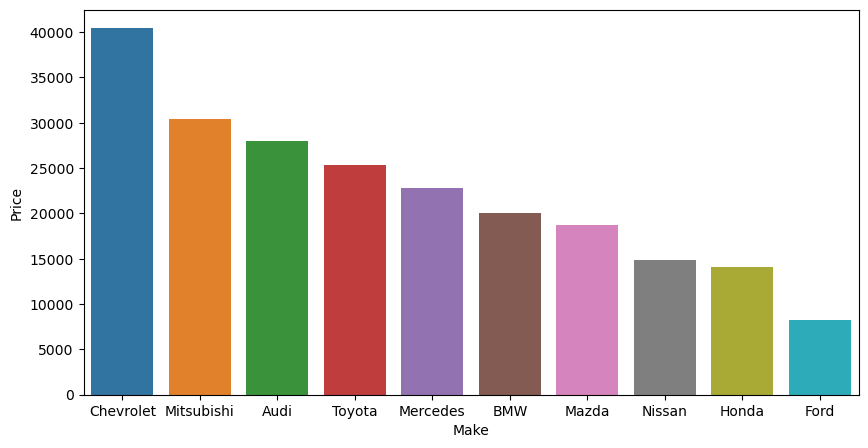

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data = car_by_price, x = "Make", y = "Price")

* Chevrolet has the maximum avg price
* Ford has the minimum avg price

# Q4.Which fuel type car has the highest average price?


In [17]:
car_by_fuel = car_df.groupby(['Fuel Type'],as_index=False).mean(numeric_only=True).sort_values(by="Price",ascending=False)

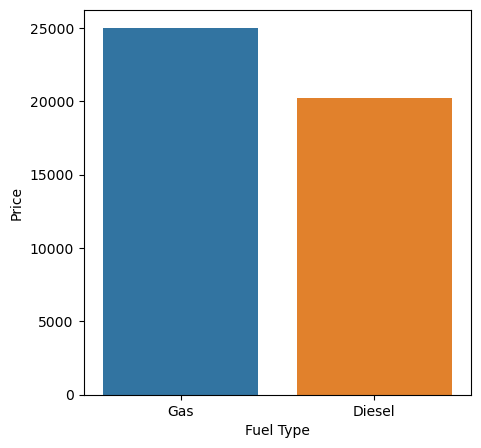

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(data = car_by_fuel, x = "Fuel Type", y = "Price")
plt.show()

* Gas fuel-type cars have the highest avg price

# Q5. For the given dataset, construct the following contingency table (take make as row variable and 'Fuel Type','Body Style' as col variable )


In [19]:
pd.crosstab(car_df['Make'],car_df['Fuel Type'])

Fuel Type,Diesel,Gas
Make,,
Audi,2,1
BMW,4,0
Chevrolet,0,1
Ford,0,2
Honda,0,1
Mazda,2,1
Mercedes,1,2
Mitsubishi,1,2
Nissan,0,1


In [20]:
pd.crosstab(car_df['Make'],car_df['Body Style'])

Body Style,Convertible,Hardtop,Hatchback,Sedan,Wagon
Make,,,,,
Audi,1,0,0,1,1
BMW,1,1,1,0,1
Chevrolet,0,0,1,0,0
Ford,0,0,0,0,2
Honda,0,0,0,1,0
Mazda,0,0,2,1,0
Mercedes,0,0,1,2,0
Mitsubishi,1,0,1,0,1
Nissan,0,0,0,1,0


# Q6. What is the probability that a randomly selected car will be a BMW?



In [21]:
car_df['Make'].value_counts()['BMW'] / car_df['Make'].value_counts().sum()

0.16

* The probabilty that a randomly selected car will be BMW is 16%

# Q7.What is the probability that a randomly selected car will be an Audi?


In [22]:
car_df['Make'].value_counts()['Audi'] / car_df['Make'].value_counts().sum()

0.12

* The probabilty that a randomly selected car will be an Audi is 12%

# Q8.Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel  Cars

__Null Hypothesis__ - There is no difference bvetween avg price of gas and Diesel Cars <br>
__Alternate Hypothesis__ - There is a difference between avg price of gas and Diesel Cars <br><br>

<center>H0 - mu(Gas) - mu(Diesel) = 0 </center><br>
<center>H1 - mu(Gas) - mu(Diesel) != 0</center>

# Q9. Find the p-value. At 0.05 level of significance, is the price of gas cars significantly different from that of diesel cars?


In [23]:
car_df_gas = car_df[car_df['Fuel Type'] == 'Gas']['Price']
car_df_diesel = car_df[car_df['Fuel Type'] == 'Diesel']['Price']
len(car_df_gas),len(car_df_diesel)

(13, 12)

* Total no of data < 30 in both the dataset, Hence we choose 2 sample t test for testing the above hypothesis

In [24]:
aplha = 0.05
t_st,p_val = stats.ttest_ind(car_df_gas,car_df_diesel)
p_val

0.27276131360711153

* Since p_val > aplha, Hence we fail to reject the null hypothesis
* Thus there is no significant difference in price between the gas and diesel cars

# Q10. Suppose you randomly select a car from this dataset. What is the probability that it is a 'Luxury Car' ?
( consider BMW, Mercedes and Audi as a luxary car under the column Make )

In [25]:
total_car = car_df['Make'].value_counts().sum()
lux_car = car_df[(car_df['Make']=='BMW') | (car_df['Make']=='Audi') | (car_df['Make']=='Mercedes')]
p = len(lux_car) / total_car
p

0.4

* Probability that the car is a Luxury Car is 40%

# Q11. You want to select a subset of three unique cars from the dataset to participate in a race. How many different ways can you arrange the cars in the race, considering their 'Make' as the criteria?

In [26]:
car_makes = list(car_df['Make'].unique())
no_car_to_select = 3
len(list(itertools.permutations(car_makes,no_car_to_select)))

720

* Thus the cars can be arranged in 720 ways considering the 'Make' as the criteria

# Q12. If you randomly pick a car with 8 cylinders, what is the probability that BMW?

In [27]:
comb = pd.crosstab(index = car_df['Make'],columns=car_df['Number of Cylinders'])
comb

Number of Cylinders,Eight,Five,Four,Six,Three,Twelve,Two
Make,,,,,,,
Audi,1,1,0,1,0,0,0
BMW,2,0,0,0,0,1,1
Chevrolet,0,0,0,0,0,0,1
Ford,0,0,0,1,0,0,1
Honda,0,0,0,0,1,0,0
Mazda,1,1,0,0,0,0,1
Mercedes,0,1,0,1,0,0,1
Mitsubishi,0,0,1,0,1,1,0
Nissan,0,0,0,0,0,0,1


In [28]:
comb.iloc[1,0]/comb['Eight'].sum()

0.4

* The probability of picking a BMW with 8 cylinder is 40%

# Q13. You are conducting a random survey by selecting 7 cars from the dataset. Calculate the probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration.

In [29]:
total = car_df['Aspiration'].value_counts().sum()
tot_turbo = car_df['Aspiration'].value_counts()['Turbo']

p_turbo = tot_turbo/total
p_turbo

0.44

In [30]:
k = 3
n = 7
stats.binom.pmf(k,n,p_turbo)

0.29320959754240045

* The probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration is 29.32%